# Politics Analysis
Marianne Aubin Le Quere
November 6th 2019

We want to know what different dimensions we are working with in our dataset. This will better allow us to see whether we are succeeding at our significance tests.

Credit to: https://github.com/kapadias/mediumposts/blob/master/nlp/published_notebooks/Introduction%20to%20Topic%20Modeling.ipynb
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


In [1]:
import os
os.chdir('../..')

In [3]:
# import required modules and set up environment
import numpy as np
import pandas as pd

# replace file path below with your own local convokit
# os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, PolTracker, Transformer
import nltk

## 1. Read in data

In [4]:
subreddits = ['Conservative', 'Liberal', 'democrats', 'Republican']

In [5]:
corpora = []
for subreddit in subreddits:
    corpus = convokit.Corpus(filename='/Users/calebchiam/Documents/datasets/{}-filtered-labelled-small'.format(subreddit))
    corpora.append(corpus)

In [21]:
corpus = corpora[1]

In [36]:
corpus = convokit.Corpus(filename='/Users/calebchiam/Documents/datasets/relationships-filtered-corpus')

In [37]:
# now put all utterances into a df

conv_text = []

for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        conv_text.append(utt.text)
    
print(len(conv_text))
            

1129641


In [38]:
# create dataframe
s = pd.DataFrame(conv_text, columns=['utt_text'])

In [39]:
s.head()

,utt_text
0,[removed]
1,The above submission has been **temporarily re...
2,I went over my classmates apartment yesterday ...
3,"Well, if you're interested in him as more than..."
4,"Haha, you're both overthinking it.\n\nDo you l..."


## 2. Data Cleaning
Now we clean the data to get rid of punctuation and upper/lower caase.



In [40]:
import re
# remove lowercase and strip whitespaces
#remove punctuation
s["utt_text_cleaned"] = s['utt_text'].str.replace('&gt;',' ').str.replace('&lt;',' ').str.strip().str.lower().str.replace('\.',' ').str.replace('\n',' ').str.replace('[^\w\s]','')

In [26]:
s[250:270]

,utt_text,utt_text_cleaned
250,"Well, sure, I took it to the fullest extent, ...",well sure i took it to the fullest extent but...
251,&gt;Did a reverse image search on that and onl...,did a reverse image search on that and only fo...
252,"&gt;It says for a ""well regulated militia"" wha...",it says for a well regulated militia what else...
253,"""conservatives are hierarchical-individualists...",conservatives are hierarchicalindividualists ...
254,Why is that? I understand it as they want a hi...,why is that i understand it as they want a hie...
255,You can't have self-determination in a hierarc...,you cant have selfdetermination in a hierarchi...
256,It's not implied that the upper class makes th...,its not implied that the upper class makes the...
257,That's just not how the world works.,thats just not how the world works
258,Yeah you're right. But ideology is separate fr...,yeah youre right but ideology is separate fro...
259,"First off, I am a liberal and I agree with 95%...",first off i am a liberal and i agree with 95 o...


In [41]:
s.head()

,utt_text,utt_text_cleaned
0,[removed],removed
1,The above submission has been **temporarily re...,the above submission has been temporarily remo...
2,I went over my classmates apartment yesterday ...,i went over my classmates apartment yesterday ...
3,"Well, if you're interested in him as more than...",well if youre interested in him as more than a...
4,"Haha, you're both overthinking it.\n\nDo you l...",haha youre both overthinking it do you like ...


In [42]:
## use nltk to remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
temp_stop = set()
for i,word in enumerate(stop):
    w = re.sub(r'[^\w\s]','',word)
    temp_stop.add(w)
stop = temp_stop

s["utt_text_cleaned_no_stopwords"] = s["utt_text_cleaned"].apply(
    lambda x: [item for item in nltk.word_tokenize(x) if item not in stop])

s[250:270]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/calebchiam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords
250,"Of course she takes it personally, it is perso...",of course she takes it personally it is person...,"[course, takes, personally, personally]"
251,"Ok, I can relate to this. I used to over-think...",ok i can relate to this i used to overthink a...,"[ok, relate, used, overthink, lot, relationshi..."
252,"don't put her through this, it might kill her ...",dont put her through this it might kill her se...,"[put, might, kill, selfesteem, get, help, find..."
253,So there was this girl I met in highschool who...,so there was this girl i met in highschool who...,"[girl, met, highschool, going, rough, time, be..."
254,[removed],removed,[removed]
255,The above submission has been **temporarily re...,the above submission has been temporarily remo...,"[submission, temporarily, removed, include, ag..."
256,[deleted],deleted,[deleted]
257,"She is 18, she is still years away from full d...",she is 18 she is still years away from full de...,"[18, still, years, away, full, development, ad..."
258,[deleted],deleted,[deleted]
259,[removed],removed,[removed]


In [43]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

s['utt_text_cleaned_no_stopwords_stemmed'] = s['utt_text_cleaned_no_stopwords'].apply(
    lambda x: [stemmer.stem(item) for item in x])

s[250:270]

,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords,utt_text_cleaned_no_stopwords_stemmed
250,"Of course she takes it personally, it is perso...",of course she takes it personally it is person...,"[course, takes, personally, personally]","[cours, take, person, person]"
251,"Ok, I can relate to this. I used to over-think...",ok i can relate to this i used to overthink a...,"[ok, relate, used, overthink, lot, relationshi...","[ok, relat, use, overthink, lot, relationship,..."
252,"don't put her through this, it might kill her ...",dont put her through this it might kill her se...,"[put, might, kill, selfesteem, get, help, find...","[put, might, kill, selfesteem, get, help, find..."
253,So there was this girl I met in highschool who...,so there was this girl i met in highschool who...,"[girl, met, highschool, going, rough, time, be...","[girl, met, highschool, go, rough, time, best,..."
254,[removed],removed,[removed],[remov]
255,The above submission has been **temporarily re...,the above submission has been temporarily remo...,"[submission, temporarily, removed, include, ag...","[submiss, temporarili, remov, includ, age, gen..."
256,[deleted],deleted,[deleted],[delet]
257,"She is 18, she is still years away from full d...",she is 18 she is still years away from full de...,"[18, still, years, away, full, development, ad...","[18, still, year, away, full, develop, adult, ..."
258,[deleted],deleted,[deleted],[delet]
259,[removed],removed,[removed],[remov]


In [44]:
s['utt_text_cleaned_no_stopwords_stemmed_split'] = s['utt_text_cleaned_no_stopwords_stemmed'].apply(' '.join)

s[250:270]

,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords,utt_text_cleaned_no_stopwords_stemmed,utt_text_cleaned_no_stopwords_stemmed_split
250,"Of course she takes it personally, it is perso...",of course she takes it personally it is person...,"[course, takes, personally, personally]","[cours, take, person, person]",cours take person person
251,"Ok, I can relate to this. I used to over-think...",ok i can relate to this i used to overthink a...,"[ok, relate, used, overthink, lot, relationshi...","[ok, relat, use, overthink, lot, relationship,...",ok relat use overthink lot relationship base j...
252,"don't put her through this, it might kill her ...",dont put her through this it might kill her se...,"[put, might, kill, selfesteem, get, help, find...","[put, might, kill, selfesteem, get, help, find...",put might kill selfesteem get help find anoth ...
253,So there was this girl I met in highschool who...,so there was this girl i met in highschool who...,"[girl, met, highschool, going, rough, time, be...","[girl, met, highschool, go, rough, time, best,...",girl met highschool go rough time best friend ...
254,[removed],removed,[removed],[remov],remov
255,The above submission has been **temporarily re...,the above submission has been temporarily remo...,"[submission, temporarily, removed, include, ag...","[submiss, temporarili, remov, includ, age, gen...",submiss temporarili remov includ age gender in...
256,[deleted],deleted,[deleted],[delet],delet
257,"She is 18, she is still years away from full d...",she is 18 she is still years away from full de...,"[18, still, years, away, full, development, ad...","[18, still, year, away, full, develop, adult, ...",18 still year away full develop adult situat e...
258,[deleted],deleted,[deleted],[delet],delet
259,[removed],removed,[removed],[remov],remov


In [46]:
s = s[s['utt_text'] != "[removed]"]

In [47]:
s = s[s['utt_text'] != "[deleted]"]

## 3. Exploratory Analysis
Check whether preprocessing was done well.

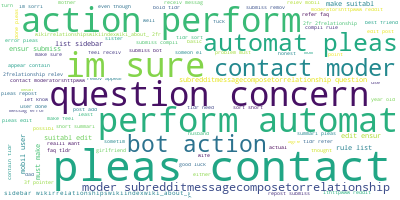

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(s['utt_text_cleaned_no_stopwords_stemmed_split'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

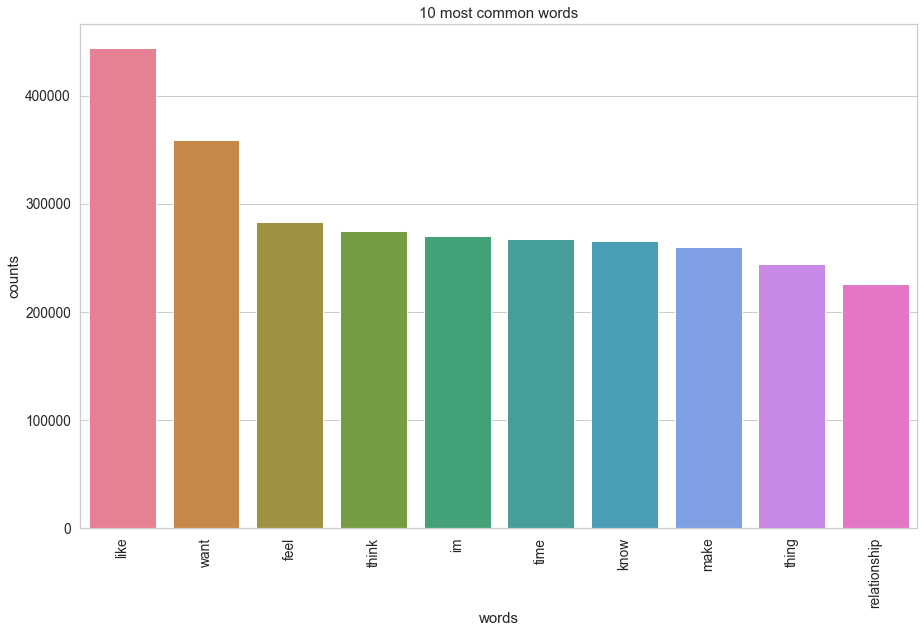

In [49]:
# Load the library with the CountVectorizer method
# this code taken from source cited at the top of this notebook
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(s['utt_text_cleaned_no_stopwords_stemmed_split'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 4. Run LDA Model

In [50]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 8
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
money work pay job want live make like time hous

Topic #1:
pleas reddit submiss tldr contact edit post question remov moder

Topic #2:
like say im think peopl know ask someth want thing

Topic #3:
hes relationship peopl abus need like make person life think

Topic #4:
thank like im dog good eat fuck peopl make weight

Topic #5:
parent famili need kid help mom sister child wife mother

Topic #6:
time im friend year like want feel day realli thing

Topic #7:
want feel relationship like think know thing someon time love


In [51]:
# note this takes a good 2-3 hours to run

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

# LDAvis_data_filepath = os.path.join('./ldavis_prepared_whatever'+'str(number_topics)')

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

# with open(LDAvis_data_filepath, 'w') as f:
#     pickle.dump(LDAvis_prepared, f)
        
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath) as f:
#     LDAvis_prepared = pickle.load(f)

# pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

# LDAvis_prepared

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [52]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.070682 -0.057392       1        1  22.513425
6      0.074465  0.052937       2        1  19.544746
2      0.081165 -0.048903       3        1  14.264010
3      0.051643 -0.116604       4        1  12.138128
0      0.078079  0.164568       5        1   9.354867
5      0.038865  0.003204       6        1   9.136230
4      0.097552 -0.003034       7        1   7.235779
1     -0.492450  0.005223       8        1   5.812816, topic_info=       Category           Freq  \
140927  Default  109642.000000   
149304  Default   71030.000000   
169605  Default   58912.000000   
177369  Default   74292.000000   
150101  Default  224062.000000   
61589   Default   70676.000000   
142180  Default   79866.000000   
74671   Default   52520.000000   
136427  Default   75201.000000   
122631  Default   45113.000000   
80610   Default   90570.000000   
146811  Default   55644.000000   
162377  Default   37601.000000   
109062  Default   67557.000000   
173930  Default   51957.000000   
122349  Default   46229.000000   
137600  Default   36630.000000   
101916  Default  266681.000000   
81773   Default  280558.000000   
150907  Default   29489.000000   
13315   Default   41768.000000   
34822   Default   38192.000000   
159468  Default   66195.000000   
123576  Default   35086.000000   
122197  Default   25833.000000   
107533  Default   48335.000000   
120068  Default   39615.000000   
60695   Default   43364.000000   
138460  Default   25051.000000   
12578   Default   44493.000000   
...         ...            ...   
148667   Topic8   14131.527624   
141251   Topic8   13941.330973   
8338     Topic8   13867.939980   
81051    Topic8   13795.582591   
8306     Topic8   13139.197694   
106309   Topic8   13137.130342   
8339     Topic8   13136.096666   
60322    Topic8   13136.096666   
38493    Topic8   12500.385305   
138460   Topic8   25049.286661   
117353   Topic8    5072.381180   
76814    Topic8   23701.032750   
150591   Topic8   23057.831689   
149304   Topic8   67991.807597   
140927   Topic8   94671.928959   
150907   Topic8   27855.615493   
74671    Topic8   42397.991729   
113628   Topic8   24211.580507   
177369   Topic8   48513.946976   
18944    Topic8   21113.102350   
61589    Topic8   42558.229954   
154626   Topic8   23634.256125   
142180   Topic8   41621.234610   
13616    Topic8   22028.279254   
146811   Topic8   29441.484190   
60695    Topic8   25041.368926   
13315    Topic8   24391.508162   
120068   Topic8   22701.592113   
102756   Topic8   21294.058348   
116604   Topic8   25385.387108   

                                                     Term          Total  \
140927                                              pleas  109642.000000   
149304                                             reddit   71030.000000   
169605                                            submiss   58912.000000   
177369                                               tldr   74292.000000   
150101                                       relationship  224062.000000   
61589                                             contact   70676.000000   
142180                                               post   79866.000000   
74671                                                edit   52520.000000   
136427                                             parent   75201.000000   
122631                                              money   45113.000000   
80610                                              famili   90570.000000   
146811                                           question   55644.000000   
162377                                             sister   37601.000000   
109062                                                kid   67557.000000   
173930                                              thank   51957.000000   
122349                                                mom   46229.000000   
137600          